In [2]:
import numpy as np
import pandas as pd
import sklearn.metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Reading of data

In [4]:
data=pd.read_csv('/content/drive/MyDrive/ML_Lab_SEE/Prg6/HR_comma_sep.csv')
data.shape
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


The dataset shows employees and their data. Target attribute is whether the employee left the company or not.

In [8]:
testX = [[0.37,0.32,2,188,3,0,0,7,0]] 

Preprocessing is required.
String data is converted to integer using label encoding

In [5]:
le = preprocessing.LabelEncoder()
data['Encoded Salary']=le.fit_transform(data['salary'])
data['Dept']=le.fit_transform(data['sales']) 
print(data[['Encoded Salary','Dept']])
data.sales.unique()
pd.unique(data[['sales', 'Dept']].values.ravel('K'))

       Encoded Salary  Dept
0                   1     7
1                   2     7
2                   2     7
3                   1     7
4                   1     7
...               ...   ...
14994               1     8
14995               1     8
14996               1     8
14997               1     8
14998               1     8

[14999 rows x 2 columns]


array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD', 7, 2, 3, 9, 8, 4, 0, 6,
       5, 1], dtype=object)

In [9]:
X=data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
        'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Dept', 'Encoded Salary']]
y=data['left']

Check if dataset is balanced

In [11]:
stay=0
left=0
for val in y:
  if val==0:
    stay+=1
  else:
    left+=1
print(stay)
print(left)

11428
3571


We can see a huge difference between count of vals in target variable, hence the dataset is highly imbalanced

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=False,
                    learning_rate_init=0.01)

clf.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5)

In [14]:
y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred,labels=[0,1])
cm

array([[2175,  119],
       [  67,  639]])

In [15]:
tn,fp,fn,tp=cm.ravel()
print('True Positive : ',tp)
print('True Negative : ',tn)
print('False Positive : ',fp)
print('False Negative : ',fn)

True Positive :  639
True Negative :  2175
False Positive :  119
False Negative :  67


In [19]:
recall=(tp)/(tp+fn)
print("Recall: ",recall)

specificity=(tn)/(fp+tn)
print("Specificity: ",specificity)

precision=(tp)/(tp+fp)
print("Precision: ",precision)

npv=(tn)/(fn+tn)
print("NPV: ",npv)

f1_score=(2*precision*recall)/(precision+recall)
print("F1Score: ",f1_score)

mcc=(tp*tn-fp*fn)/(np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print("MCC: ",mcc)

from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,y_pred)
print("ROC AUC Score: ",roc)

Recall:  0.9050991501416431
Specificity:  0.9481255448997384
Precision:  0.8430079155672823
NPV:  0.9701159678858162
F1Score:  0.8729508196721311
MCC:  0.8329329969992387
ROC AUC Score:  0.9266123475206908


In [17]:
testpred=clf.predict(testX)
print("testpred is :", testpred)
if testpred == 0: 
  print("Employee will stay")
else:
  print("Employee will leave")

testpred is : [1]
Employee will leave


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


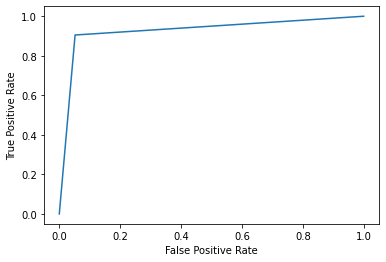

In [18]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label="ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Inference : Multi layer perceptron (MLP) is a supplement of feed forward neural network. It consists of three types of layers—the input layer, output layer and hidden layer. MLPs are useful in research for their ability to solve problems stochastically, which often allows approximate solutions for extremely complex problems like fitness approximation.